# Genexpert data exploration and analysis

*Initialize...*

In [1]:
from IPython.display import display, HTML

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as mlp
import matplotlib.pyplot as plt
import geopandas as gp

import os

os.chdir("../../../core")
import GT_helper_functions as hf
import GT_load_data as data

base_dir = "../../Outcome Measurement Data/"

In [2]:
%matplotlib inline
plt.style.use('ggplot')
mlp.rcParams["figure.facecolor"] = "white"
mlp.rcParams["figure.dpi"] = 200
mlp.rcParams["figure.figsize"] = [10,7]
pd.options.display.max_columns = 100
pd.options.display.max_seq_items = 200

In [3]:
priordepts2014 = [1, 5, 12, 10, 9, 11, 18, 19 ]
priordepts2018 = [10, 11, 12, 14, 9, 13, 16, 18, 1, 5, 17]
labs2018 = [17, 16,18,19,1,13,12,9,11,10,5]
labs2016 = [1, 9, 12, 10, 18, 5, 11]

## Read cohort data

In [4]:
datadf = pd.read_csv(\
"../../Outcome Measurement Data/TUBERCULOSIS/GTM - Tx cohort data 2012-2016.csv", index_col = 0)
#deptos = gp.read_file("../../../../Covariates and Other Data/GIS/GT-IGN-cartografia_basica-Departamentos.geojson")

In [5]:
temp = datadf[#(datadf.row_name_.isin(["FALLECIDOS"])) & 
              (datadf.col_name.isin(["TOTAL"])) & 
       (datadf.table.isin(["Nuevos Pulmonares BK+", "Nuevos Pulmonares BK-", "Nuevos Pediatricos", 
                          "Nuevos Extrapulmonares", "Nuevos TB/VIH", "Retratamiento"
                          ])) &
       (datadf.deptocode!=0)].\
    groupby(["year", "row_name"]).value.sum().unstack(1)
temp["total"] = temp.sum(axis="columns")
temp

row_name,ABANDONO/PERDIDA_SEGM,CURADOS,FALLECIDOS,FRACASO_TERAPEUTICO,TRANSFERIDOS,TRATAMIENTOS COMPLETOS,total
year,,,,,,,
2012,194.0,1926.0,227.0,49.0,30.0,1221.0,3647.0
2013,252.0,1859.0,244.0,48.0,23.0,1046.0,3472.0
2014,257.0,1829.0,198.0,50.0,3.0,925.0,3262.0
2015,258.0,1911.0,211.0,46.0,8.0,1015.0,3449.0
2016,215.0,1899.0,196.0,42.0,12.0,922.0,3286.0


In [6]:
temp = datadf[(datadf.col_name.isin(["TOTAL"])) & 
       (datadf.table.isin(["Nuevos Pulmonares Genexpert"
                          ])) &
       (datadf.deptocode!=0)].\
    groupby(["year", "row_name"]).value.sum().unstack(1)

In [7]:
temp["total"] = temp.sum(axis="columns")
temp

row_name,ABANDONO/PERDIDA_SEGM,CURADOS,FALLECIDOS,FRACASO_TERAPEUTICO,TRANSFERIDOS,TRATAMIENTOS COMPLETOS,total
year,,,,,,,
2016,15.0,25.0,11.0,1.0,0.0,137.0,189.0


## Read notifications data 

In [8]:
tbnots = pd.read_csv(base_dir + "TUBERCULOSIS/Notificaciones TB/GTM - TB notifications 2012-Jun2018.csv", 
                     encoding="latin-1", index_col = 0, low_memory = False)

In [9]:
tbnots.columns

Index(['NOMBRES', 'DIRECCION', 'MUNICIPIO', 'DEPARTAMENTO', 'SERVICIODESALUD',
       'SEXO', 'EDAD', 'RANGOEDAD', 'PESOLBS', 'PESOKG', 'CONDICIONINGRESO',
       'FECHANOTIFICACION', 'FECHAINICIOTX', 'CLASIFICACION', 'VIH', 'ESQUEMA',
       'CONTACTOS', 'OTRASPATOLOGIAS', 'YEAR', 'YearMonth',
       'TIPODETBPEDIATRICOS', 'FECHAPRUEBAVIH', 'CONDICIONEGRESO',
       'FECHAMUERTE', 'CAUSADEMUERTE', 'PACIENTEPRIVADOLIBERTAD', 'DEPORTADO',
       'LOCALIZACIONTB', 'METODODX', 'CONTACTO_000_014', 'CONTACTO_MAYORA_015',
       'CASOINDICE', 'DESARROLLOTBCLASIFICACION', 'EMPLEADOMSPAS', 'UNIDADDX',
       'FALLECIDOS', 'CORRELATIVO', 'DAS', 'FECHANACIMIENTO', 'FECHAACTUAL',
       'EDADDECADA', 'EDUCACION', 'PUEBLO', 'OCUPACION',
       'NUEVACONDICIONINGRESO', 'FECHADX', 'NUEVOMETODODX', 'PDS',
       'CONTACTO_000_0004', 'CONTACTO_MAYORA_005', 'QUIMIO_VIH', 'DBCATEGORY',
       'DISTRITO', 'MIGRACION', 'CONDICIONPX', 'CAUSAMUERTE', 'TipoTB',
       'MESNOTIFICACION', 'OTRASPATOLOGIAS_2', 

In [10]:
print(tbnots.groupby("YEAR").PDS.value_counts().unstack(0))
print(tbnots.groupby("YEAR").RESISTENCIA.value_counts().unstack(0))
print(tbnots.groupby("YEAR").RESULTADOPDS.value_counts().unstack(0))
print(tbnots[((tbnots.PDS.isna()==False) & (tbnots.PDS != "SENSIBLE")) | 
             (tbnots.RESISTENCIA.isna()==False)]\
      .groupby("YEAR").METODODX.value_counts().unstack(0))
print(tbnots.groupby("YEAR").CONTACTOS.value_counts().unstack(0))

#tbnots.YEAR

YEAR                  2016   2017   2018
PDS                                     
ACIDIFICADA            1.0    NaN    NaN
ACIDIFICADO            1.0    NaN    NaN
CONTAMINADO            6.0    NaN    NaN
MDR                    2.0    NaN    NaN
MONORESISTE A INH      1.0    NaN    NaN
ND                     1.0    NaN    NaN
NO CRECIO              1.0    NaN    NaN
REISTENTE A R          1.0    NaN    NaN
RESISTENTE INH        12.0    NaN    NaN
RESISTENTE INH, STR    1.0    NaN    NaN
RESISTENTE INH,R       3.0    NaN    NaN
RESISTENTE R           4.0    NaN    NaN
RR                     4.0    NaN    NaN
SENSIBLE             117.0    NaN    NaN
SI                    88.0  157.0  137.0
YEAR                        2017  2018
RESISTENCIA                           
INH/ISONIACIDA               NaN   1.0
INH/RIFAMPICINA              2.0   NaN
ISONIACIDA                   6.0   3.0
ISONIACIDA/ESTREPTOMICINA    1.0   NaN
ISONIACIDA/RIFAMPICINA       3.0   NaN
MDR                         19

In [11]:
tbnots[tbnots.DBCATEGORY=="MDR"].groupby(["YEAR"]).CLASIFICACION.value_counts(dropna=False)

YEAR  CLASIFICACION
2017  BK POSITIVO      41
      GENEXPERT        30
      CULTIVO          14
      NaN               8
      EXTRAPULMONAR     1
      MDR               1
2018  NaN              28
Name: CLASIFICACION, dtype: int64

# MDR

In [12]:
mdrTxC = pd.read_csv(base_dir + "TUBERCULOSIS/COHORTES/GTM - TB MDR Cohort Data 2014-2016.csv", index_col=0)

In [13]:
mdrTxC.columns

Index(['Age', 'BD_ID', 'DAS', 'DateBk_1', 'DateCulture_1', 'DateCulture_10',
       'DateCulture_11', 'DateCulture_12', 'DateCulture_13', 'DateCulture_14',
       'DateCulture_15', 'DateCulture_16', 'DateCulture_17', 'DateCulture_18',
       'DateCulture_19', 'DateCulture_2', 'DateCulture_20', 'DateCulture_21',
       'DateCulture_22', 'DateCulture_23', 'DateCulture_24', 'DateCulture_3',
       'DateCulture_4', 'DateCulture_5', 'DateCulture_6', 'DateCulture_7',
       'DateCulture_8', 'DateCulture_9', 'DateGXPERT', 'Dead', 'Depto',
       'DiabetesMel', 'DxDate', 'ExitCondition', 'ExitDate', 'GENOTYPE',
       'Gender', 'HIV', 'ID', 'Modifications', 'Muni', 'Observations',
       'PDSDate', 'PDSResult', 'PxCondition', 'PxLost', 'PxNew', 'PxRelapse',
       'Referred', 'ResistType', 'ResultBk_1', 'ResultCulture_1',
       'ResultCulture_10', 'ResultCulture_11', 'ResultCulture_12',
       'ResultCulture_13', 'ResultCulture_14', 'ResultCulture_15',
       'ResultCulture_16', 'ResultCultur

In [14]:
#for row in mdrTxC.iterrows():
#     [(row["ResultCulture_"+i] == "") for i in range(1,24) ] 
#mdrTxC.ExitCondition.value_counts(dropna=False)
mdrTxC[["ResultCulture_"+str(i) for i in range(1,24)]]

,ResultCulture_1,ResultCulture_2,ResultCulture_3,ResultCulture_4,ResultCulture_5,ResultCulture_6,ResultCulture_7,ResultCulture_8,ResultCulture_9,ResultCulture_10,ResultCulture_11,ResultCulture_12,ResultCulture_13,ResultCulture_14,ResultCulture_15,ResultCulture_16,ResultCulture_17,ResultCulture_18,ResultCulture_19,ResultCulture_20,ResultCulture_21,ResultCulture_22,ResultCulture_23
0,negativo,negativo,negativo,negativo,NaN,negativo,NaN,NEGATIVO,NaN,NEGATIVO,NaN,NEGATIVO,NaN,NEGATIVO,NaN,NEGATIVO,NEGATIVO,NaN,CONTAMINADO,NEGATIVO,NEGATIVO,NEGATIVO,NEGATIVO
1,negativo,negativo,negativo,NaN,NaN,negativo,negativo,NEGATIVO,NaN,NaN,NEGATIVO,NaN,NEGATIVO,NaN,NEGATIVO,NaN,CONTAMINADO,CONTAMINADO,CONTAMINADO,NaN,CONTAMINADO,NEGATIVO,NEGATIVO
2,.+,NaN,negativo,negativo,NEGATIVO,negativo,negativo,NEGATIVO,NaN,NaN,NaN,NaN,NEGATIVO,NEGATIVO,NaN,NEGATIVO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,negativo,negativo,negativo,NaN,NEGATIVO,negativo,negativo,negativo,NEGATIVO,NaN,NEGATIVO,NaN,NaN,negativo,2015-06-24 00:00:00,NEGATIVO,NaN,CONTAMINADO,NaN,NaN,NEGATIVO,NaN,CONTAMINADO
4,negativo,negativo,negativo,NaN,NaN,negativo,NEGATIVO,NEGATIVO,NaN,NaN,NEGATIVO,NaN,NEGATIVO,NaN,NaN,POSITIVO,CONTAMINADO,NaN,NaN,NaN,CONTAMINADO,NaN,CONTAMINADO
5,negativo,.+,negativo,NaN,NaN,negativo,negativo,negativo,NEGATIVO,NEGATIVO,NaN,NaN,NEGATIVO,NaN,NEGATIVO,NaN,NEGATIVO,NaN,NaN,NaN,CONTAMINADO,NEGATIVO,NaN
6,.++,NaN,.++,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,.++,negativo,negativo,negativo,negativo,negativo,negativo,NaN,NaN,NEGATIVO,NEGATIVO,NaN,NaN,NaN,NEGATIVO,NaN,CONTAMINADO,CONTAMINADO,NaN,NaN,NaN,NaN,NaN
8,negativo,NaN,NaN,negativo,negativo,negativo,negativo,NaN,NaN,NEGATIVO,NaN,NaN,NEGATIVO,NaN,CONTAMINADO,NaN,CONTAMINADO,CONTAMINADO,NaN,NaN,NaN,NEGATIVO,CONTAMINADO
9,NaN,NaN,negativo,negativo,negativo,negativo,negativo,NaN,NEGATIVO,NaN,NEGATIVO,NaN,CONTAMINADO,NaN,NEGATIVO,NaN,CONTAMINADO,NaN,NEGATIVO,NEGATIVO,CONTAMINADO,NEGATIVO,NaN


In [15]:
mdrTxC.groupby(["BD_ID", "ExitCondition"]).ID.count()

BD_ID     ExitCondition             
MDR14-16  Vivo                           1
          ambulatorio                   23
          fallecido                      4
          viva                           1
          vivo                           2
MDR15-17  AMBULATORIO                    5
          CONTRAINDICADO                 1
          FALLECIDO                      1
          FRACASO                        2
          FUGADO                         1
MDR16-18   EGRESO CONTRAINDICADO         1
          ABANDONÓ                       1
          FALLECIDA                      1
          FALLECIDA                      3
          FALLECIDO                      6
          FRACASO                        2
          FUGADO                         1
          Fallecida                      1
          Fallecida                      1
          Fallecido                      4
          PERDIDA EN EL SEGUIMIENTO      5
          PÉRDIDA EN EL SEGUIMIENTO      2
          TX. COM

In [16]:
mdrTxC.ExitCondition.value_counts(dropna=False)

NaN                           86
ambulatorio                   23
FALLECIDO                      7
AMBULATORIO                    5
PERDIDA EN EL SEGUIMIENTO      5
fallecido                      4
Fallecido                      4
FRACASO                        4
FALLECIDA                      3
PÉRDIDA EN EL SEGUIMIENTO      2
FUGADO                         2
vivo                           2
TX. COMPLETO                   2
CONTRAINDICADO                 1
ABANDONÓ                       1
Fallecida                      1
viva                           1
FALLECIDA                      1
 EGRESO CONTRAINDICADO         1
Vivo                           1
Fallecida                      1
Name: ExitCondition, dtype: int64

In [17]:
mdrTxC.groupby("BD_ID").TxFailure.value_counts(dropna=False)

BD_ID     TxFailure                       
MDR14-16  Categoria I y II                    19
          categoria I                          8
          NaN                                  3
          virgen                               3
          Categoria I                          2
          categoria I                          2
          categoria I y II                     2
          Categoria II                         1
          categoria II                         1
MDR15-17  NaN                                 10
          FRACASO CATEGORIA I Y II            10
          fracaso categoria I y II            10
          Fracaso a Tx de categoría II         5
          FRACASO A TX DE CATEGORIA I Y II     3
          fracaso a categoria I                1
          fracaso categoria I, II Y IV         1
MDR16-18  False                               66
          True                                10
Name: TxFailure, dtype: int64

## Genexpert

In [18]:
#tbnots.METODODX.value_counts(dropna=False)
tbnots["Genexpert"] =  tbnots.METODODX.map(lambda x: "xpert" in str.lower(x) if not pd.isna(x) else False)

In [19]:
tbnots["Year"] = np.floor(tbnots.YearMonth/100)

In [20]:
tbnots.groupby(["Genexpert", "Year"]).apply(len)

Genexpert  Year  
False      2012.0    3374
           2013.0    3331
           2014.0    3195
           2015.0    2974
           2016.0    2942
           2017.0    3016
           2018.0    2225
True       2015.0     431
           2016.0     373
           2017.0     487
           2018.0     347
dtype: int64

In [21]:
gxpertMapData = tbnots[(tbnots.CONDICIONINGRESO == "nuevo") & 
                       (tbnots.Year>2014)].groupby(["Year", "Genexpert", "COD_DEPT"])\
                            .apply(len).unstack(1, fill_value=0)
gxpertMapData = gxpertMapData.reset_index().rename(columns={ "COD_DEPT": "deptocode", True: "Gx", False: "NoGx"})\
    .assign(Total = lambda x: x.Gx + x.NoGx)\
    .assign(Percentage = lambda x: x.Gx/x["Total"]*100)

In [22]:
gxpertMapData = gxpertMapData.merge(
    mdrTxC.assign(Year = lambda x: x.BD_ID.map(lambda x: int("20" + x[3:5])) ).groupby("Year").deptocode\
    .value_counts().rename("MDRCases").reset_index(),
    left_on = ["Year", "deptocode"], right_on = ["Year", "deptocode"], how = "outer", suffixes = ("x", "y")
).fillna(0)


In [23]:
gxpertMapData[gxpertMapData.Year == 2015]

,Year,deptocode,NoGx,Gx,Total,Percentage,MDRCases
0,2015.0,1.0,545.0,68.0,613.0,11.092985,4.0
1,2015.0,2.0,18.0,0.0,18.0,0.000000,0.0
2,2015.0,3.0,41.0,0.0,41.0,0.000000,0.0
3,2015.0,4.0,21.0,1.0,22.0,4.545455,0.0
4,2015.0,5.0,553.0,40.0,593.0,6.745363,9.0
5,2015.0,6.0,43.0,5.0,48.0,10.416667,0.0
6,2015.0,7.0,67.0,4.0,71.0,5.633803,0.0
7,2015.0,8.0,42.0,4.0,46.0,8.695652,0.0
8,2015.0,9.0,176.0,37.0,213.0,17.370892,3.0
9,2015.0,10.0,417.0,51.0,468.0,10.897436,3.0


(-92.44118572530694, -88.02056507210258, 13.53544427893005, 18.02345642776848)

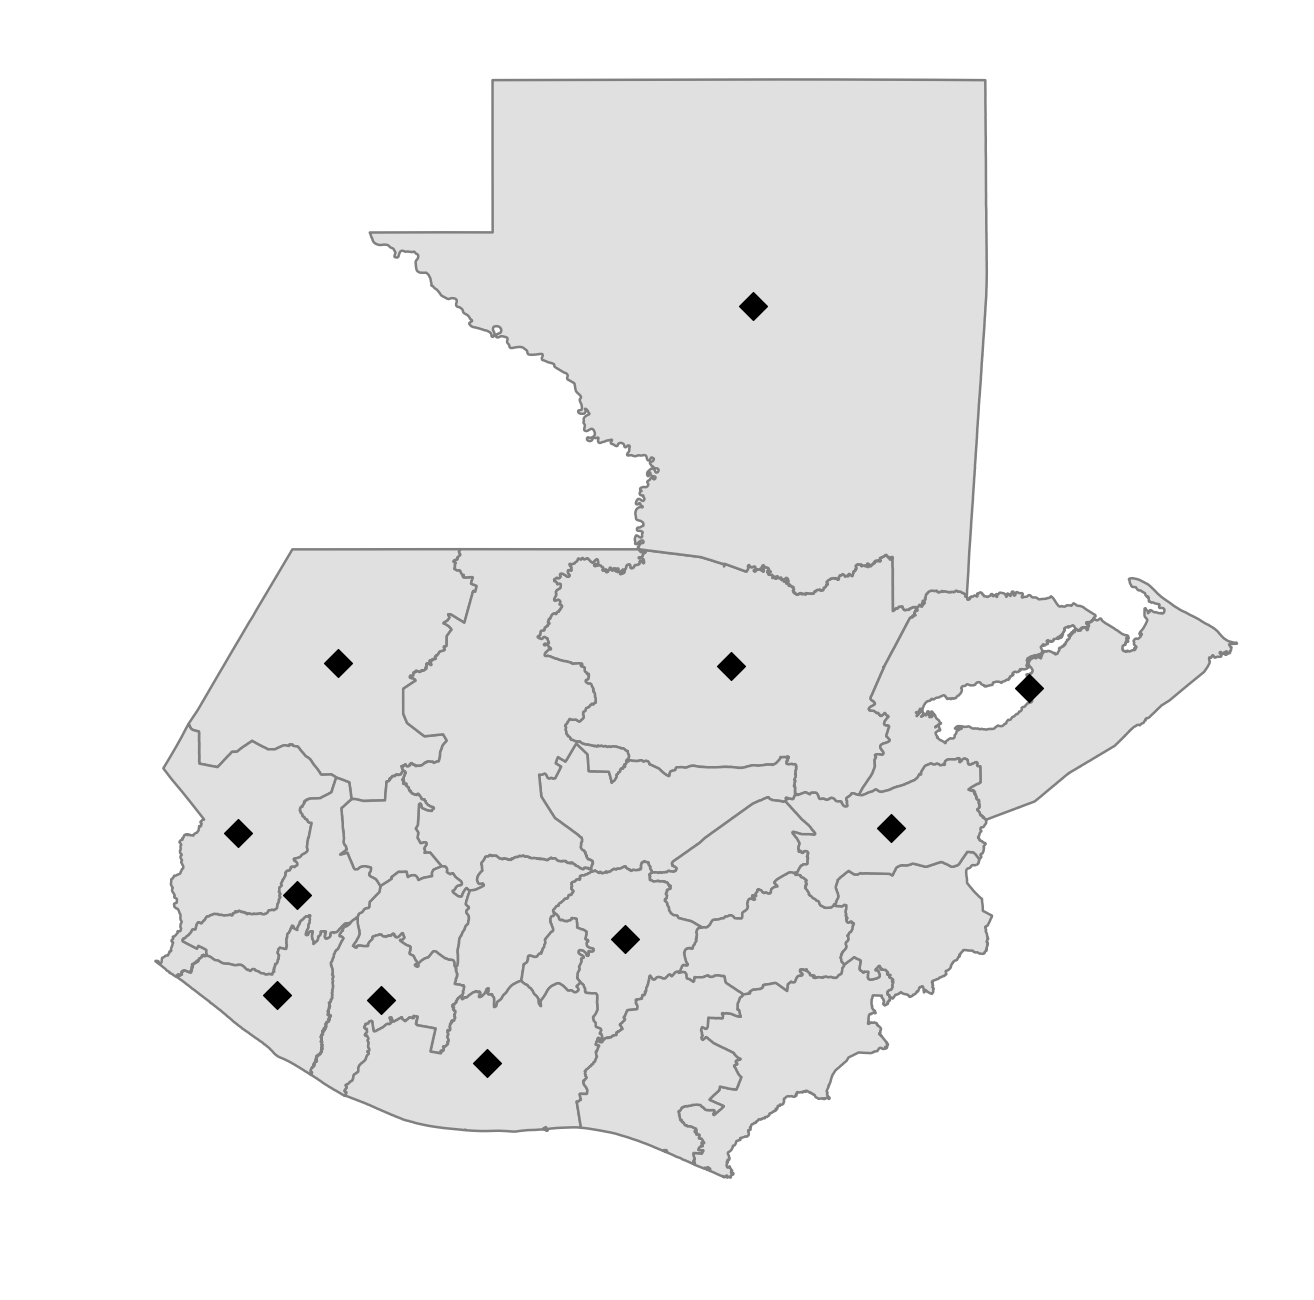

In [35]:
mlp.rcParams['figure.figsize'] = [8, 8]
ax = data.deptosGTshp.plot(color="#e0e0e0", linewidth=0.9, edgecolor="gray")
j = 0
labsLabel = ""
labsColor = "black"
labsMarker = "D"
for i, depto in data.deptosGTshp[data.deptosGTshp.deptocode.isin(labs2018)].iterrows():
    plt.scatter(depto.geometry.centroid.x, depto.geometry.centroid.y,
                50, linewidths= 0.5, edgecolor = "black", alpha=1,
                label = labsLabel if j == 0 else None,
                marker=labsMarker, color = labsColor)
    j += 1
plt.grid()
plt.axis("off")

In [22]:
mlp.rcParams['figure.figsize'] = [8, 8]

def deptosMap2Way(x, y = None, mapdata = None, xlabel="", ylabel="", ymax = None, xmax = None, grayZeroX = True):
    if xmax is None:
        xmax = temp[x].max()
    mapdata = mapdata.assign(deptocode=lambda x: (x.deptocode * 100).astype(int).astype(str)\
                                                 .map(lambda y: y if y != "100" else "101"))
    temp = data.deptosGTshp.merge(mapdata[["deptocode", x]], 
                         left_on="CODIGO", right_on = "deptocode", how="left" )
    
    greys = temp[x].isna() | (temp[x]==0 & grayZeroX) | (np.isinf(temp[x]))
    if len(greys) > 0:
        temp[greys].plot(color="grey", ax= ax, linewidth=0.9, edgecolor="white") 
        
    goodvals = temp[greys == False]
    if len(goodvals) > 0:
        goodvals.plot(x, ax=ax, vmin = 0, vmax = xmax,
                                    legend=False, edgecolor="black", cmap = "Blues", linewidth=0.75)
    l1 = ax.get_legend()
    for i, depto in data.deptosGTshp.iterrows():
        plt.text(depto.geometry.centroid.x, (depto.geometry.bounds[3]+1.5*depto.geometry.centroid.y)/2.5, 
                 hf.abbreviate(depto.DEPARTAMEN), color="black",
                 horizontalalignment='center', alpha=0.8, fontsize=10)

    if y is not None:
        temp2 = data.deptosGTshp.merge(mapdata[["deptocode", y]][mapdata[y]>0], 
                             left_on="CODIGO", right_on = "deptocode", how="left" )\
            .assign(_x = lambda row: row.geometry.centroid.x)\
            .assign(_y = lambda row: row.geometry.centroid.y)
        if ymax is None:
            ymax = temp2[y].max()
        plt.scatter(temp2._x, temp2._y, 500 * temp2[y]/ymax, c = "red", alpha=0.8, linewidths=1.5, edgecolors="black", 
                label = ylabel + " ( " + str(temp2[y].min()) + " to " + str(temp2[y].max()) + " )")

    cmap = plt.get_cmap('Blues')
    norm = mlp.colors.Normalize(vmin=0,vmax=xmax)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, shrink = 0.8, ticks=np.linspace(0, xmax, 10))
    cbar.set_ticklabels([int(np.round(x)) for x in np.linspace(0, xmax, 10)])
    cbar.set_label(xlabel)
    plt.legend(bbox_to_anchor=(1,0))
    plt.axis("off")

data.deptosGTshp["deptocode"] = (data.deptosGTshp.CODIGO.astype(int)/100).astype(int)
    
def additionalMarkers(ax, priorized = False, 
                      labs = None, labsLabel = "", labsColor = "black", labsMarker = "*"):
    j = 0
    if priorized :
        for i, depto in data.deptosGTshp[data.deptosGTshp.deptocode.isin(priordepts2014)].iterrows():
            plt.scatter(depto.geometry.centroid.x-0.06,(depto.geometry.bounds[1]+1.5*depto.geometry.centroid.y)/2.5,
                        60, linewidths= 2, edgecolor = "black", alpha=0.7,
                        label = "Department prioritized in 2014" if j == 0 else None,
                        marker='o', color='#fF9900')
            j += 1
        j = 0
        for i, depto in data.deptosGTshp[data.deptosGTshp.deptocode.isin(priordepts2018)].iterrows():
            plt.scatter(depto.geometry.centroid.x+0.06, (depto.geometry.bounds[1]+1.5*depto.geometry.centroid.y)/2.5, 
                        60, linewidths= 2, edgecolor = "black", alpha=0.7,
                        label = "Department prioritized in 2018" if j == 0 else None,
                        marker='o', color='#50bF75')
            j += 1
        j = 0
    if labs:
        for i, depto in data.deptosGTshp[data.deptosGTshp.deptocode.isin(labs)].iterrows():
            plt.scatter(depto.geometry.centroid.x+0.17, (depto.geometry.bounds[3]+1.5*depto.geometry.centroid.y)/2.5-0.05,
                        50, linewidths= 0.5, edgecolor = "black", alpha=1,
                        label = labsLabel if j == 0 else None,
                        marker=labsMarker, color = labsColor)
            j += 1


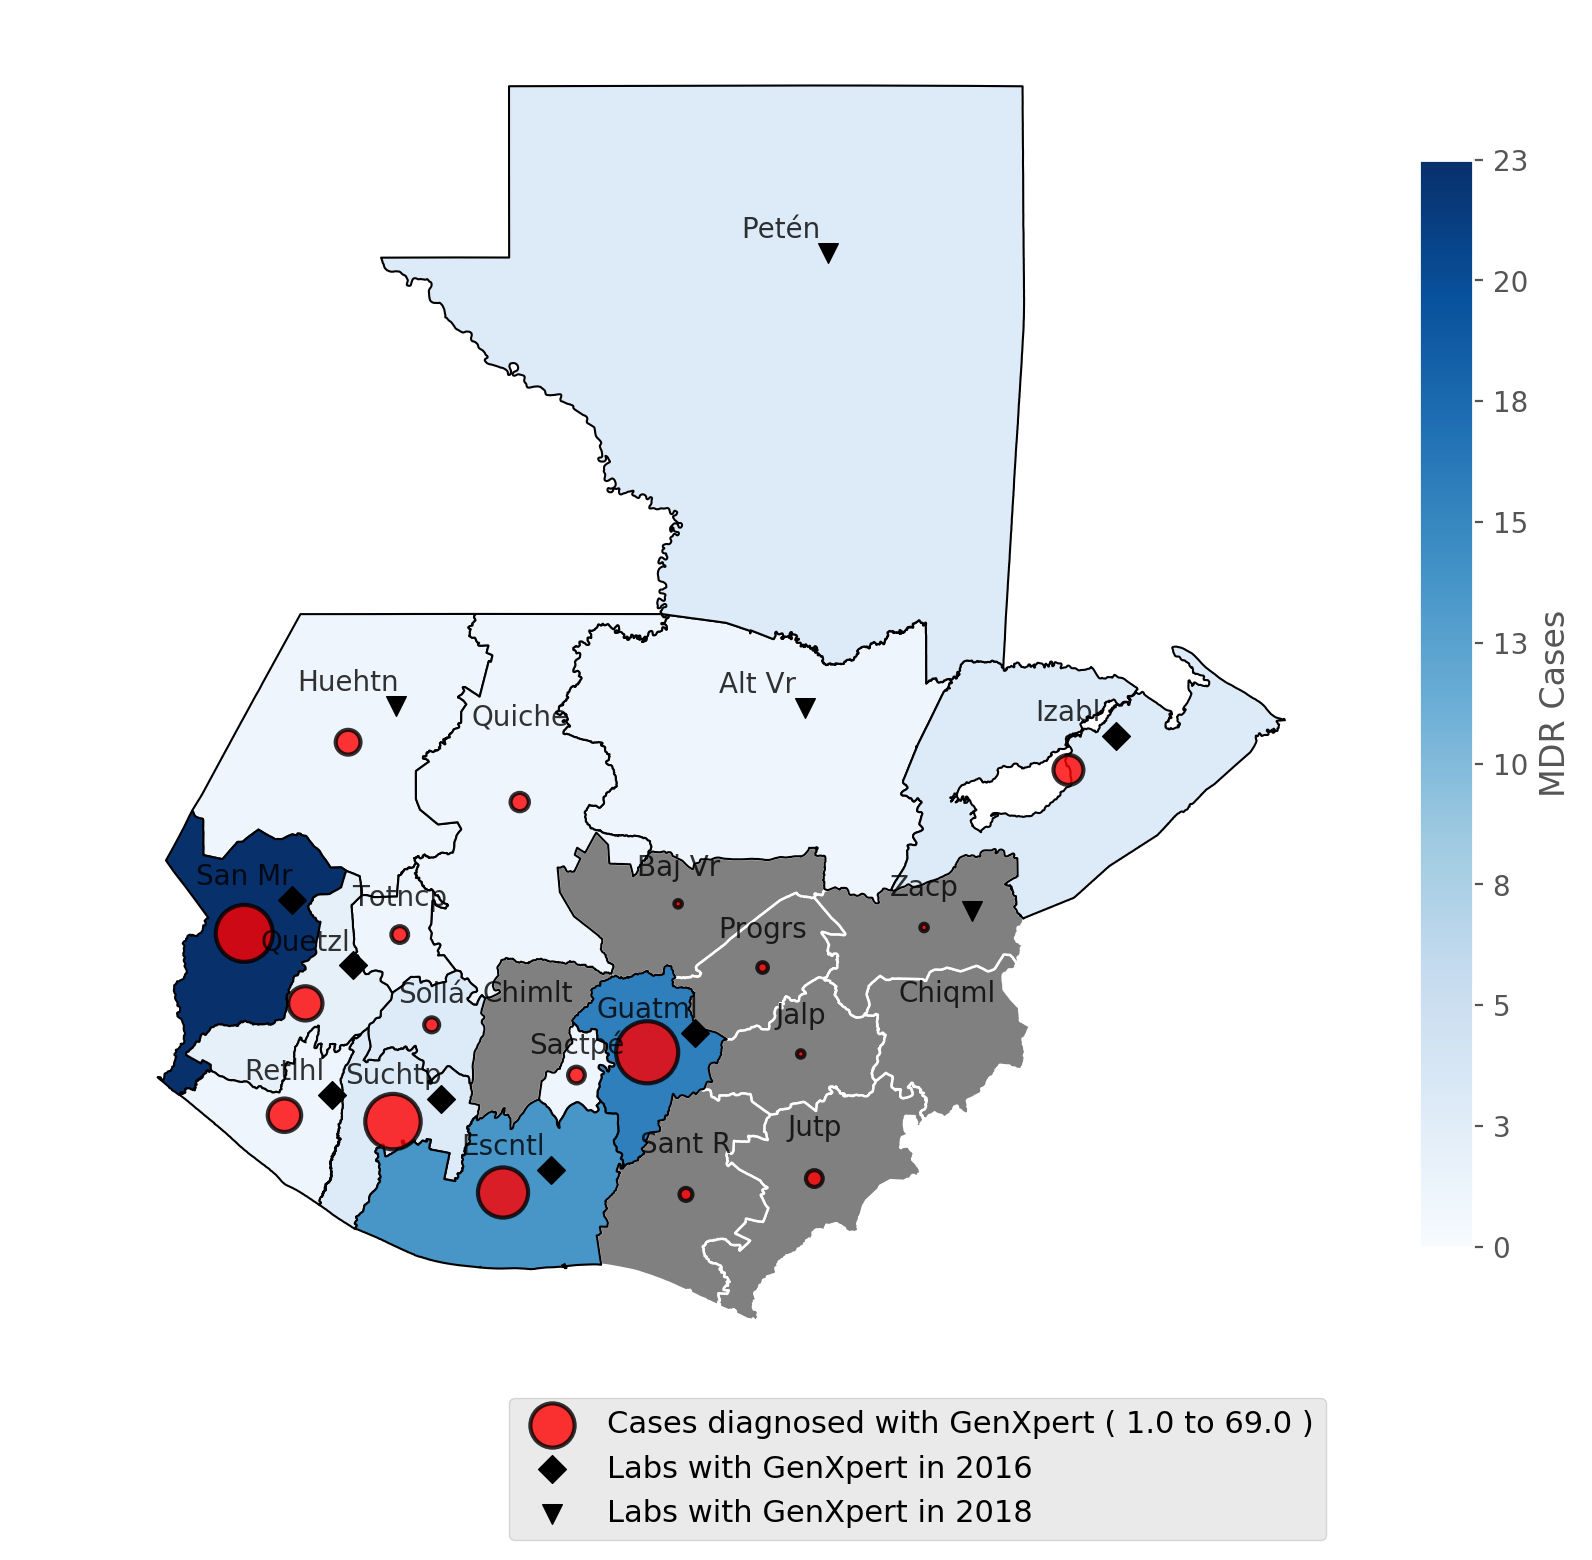

In [27]:

xmax = gxpertMapData["MDRCases"].max()
ymax = gxpertMapData["Gx"].max()
if (False):
    mlp.rcParams["figure.figsize"] = (19, 8)
    ax = plt.subplot(1,2,1)
    deptosMap2Way("MDRCases", "Gx", gxpertMapData[gxpertMapData.Year == 2015], "MDR Cases", "Cases diagnosed with GenXpert",
                 xmax = xmax)
    additionalMarkers(ax, labs = labs2016, labsLabel = "Labs with GenXpert in 2016",
                      labsMarker = "D")
    additionalMarkers(ax, labs = set(labs2018).symmetric_difference(labs2016), 
                      labsLabel = "Labs with GenXpert in 2018",
                      labsMarker = "v")
    plt.legend(bbox_to_anchor=(1,0))
    ax.set_title("2015")
    ax = plt.subplot(1,2,2)
else:
    mlp.rcParams["figure.figsize"] = (10, 9)
    ax = plt.subplot(1,1,1)
deptosMap2Way("MDRCases", "Gx", gxpertMapData[gxpertMapData.Year == 2016], "MDR Cases", "Cases diagnosed with GenXpert",
             xmax = xmax)
additionalMarkers(ax, labs = labs2016, labsLabel = "Labs with GenXpert in 2016",
                  labsMarker = "D")
additionalMarkers(ax, labs = set(labs2018).symmetric_difference(labs2016), 
                  labsLabel = "Labs with GenXpert in 2018",
                  labsMarker = "v")
plt.legend(bbox_to_anchor=(1,0), fontsize=11)
#ax.set_title("2016")

{13, 16, 17, 19}

In [51]:
#set.symmetric_difference(set([17, 16,18,19,1,13,12,9,11,10,5]), set([1, 1, 1, 1, 18, 10, 13, 11, 5, 12, 9, 9, 16, 17, 19, 1]))

Text(0,0.5,'Cases count')

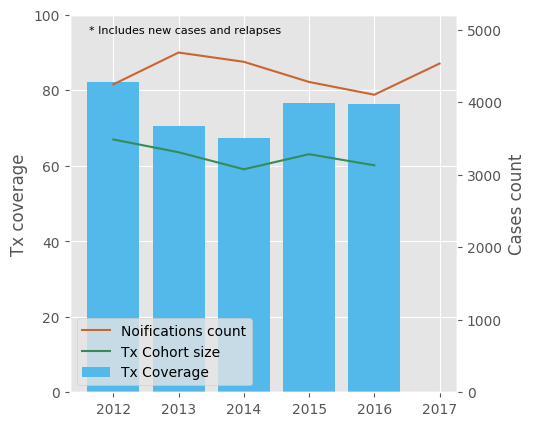

In [105]:
mlp.rcParams["figure.figsize"] = (5, 5)
# Genexpert no es confiable en notificaciones. No concuerda con datos de laboratorios (totales > 1000, en notifs es ~ 400)
# tbnots[(tbnots.CONDICIONINGRESO == "nuevo") ].groupby(["Year", "Genexpert"]).apply(len).unstack(1).fillna(0)
d = pd.concat([
    tbnots.groupby(["Year"]).apply(len).fillna(0)\
        .rename("notifications"),
    datadf[(datadf.col_name.isin(["TOTAL"])) & 
       (datadf.table.isin(["Nuevos Pulmonares BK+", "Nuevos Pulmonares BK-", 
                           "Nuevos Pediatricos", 
                           "Nuevos Extrapulmonares", "Nuevos TB/VIH", "Retratamientos"
                          ])) &
       (datadf.deptocode!=0)].\
    groupby(["year"]).value.sum().rename("cohortes")], 1)
d["coverage"] = 100*d.cohortes/d.notifications
ax = plt.axes()
plt.bar(d.index, d.coverage, color="#53B8EA", label="Tx Coverage")
plt.text(0.05,0.95, "* Includes new cases and relapses", transform=ax.transAxes, fontsize=8)
plt.ylim(0,100)
shrink = 0.9
plt.plot(d.index, shrink*100*d.notifications/d.notifications.max(), 
         label = "Noifications count",
        color= "#C96533")
plt.plot(d.index, shrink*100*d.cohortes/d.notifications.max(), label = "Tx Cohort size",
        color= "#348C5D")
plt.legend(loc="lower left")
plt.ylabel("Tx coverage")
ax2 = plt.twinx()
ax2.set_ylim(0,d.notifications.max()/shrink)
ax2.grid(False)
ax2.set_ylabel("Cases count")


In [94]:
#tbnots[(tbnots.CONDICIONINGRESO == "nuevo") ].groupby(["Year", "Genexpert", "SEXO", "EDAD"])\
#    .Genexpert.count().unstack(1).unstack(1).fillna(0).to_excel("temp.xlsx")
#tbnots.columns #FECHAINICIOTX.value_counts(dropna=False)
tbnots.CONDICIONINGRESO.value_counts()

nuevo                        18874
recaida                        870
abandono/r                     218
fracaso                         80
perdida en el seguimiento       46
abandono recuperado              4
42790                            3
especial                         1
42740                            1
42788                            1
abandono recuperada              1
Name: CONDICIONINGRESO, dtype: int64

In [10]:
# Lets start with the missing basic data for pediatric and extrapulmonares cases: 
temp = datadf[(datadf.col_name.isin(["TOTAL"])) & 
       (datadf.table.isin(["Nuevos Pulmonares BK+", "Nuevos Pulmonares BK-", "Nuevos Pediatricos", 
                          "Nuevos Extrapulmonares", "Nuevos TB/VIH", "Retratamiento"])) &
       (datadf.deptocode.isin([0]) )].\
    groupby(["table", "year"]).value.sum()
temp = temp.unstack(0).fillna(0)
temp["total"] = temp.sum(axis=1)
temp = \
    (np.round(temp.divide(temp["total"] , axis="rows")*100, decimals=0))
temp
#temp = temp.stack().reset_index()[lambda x: x["row_name"] != "total"]
#temp.columns = ["Depto", "TB Category", "Outflow condition", "Percentage"]

#temp

table,Nuevos Extrapulmonares,Nuevos Pediatricos,Nuevos Pulmonares BK+,Nuevos Pulmonares BK-,Nuevos TB/VIH,Retratamiento,total
year,,,,,,,
2012,8.0,11.0,59.0,11.0,7.0,4.0,100.0
2013,8.0,8.0,62.0,11.0,7.0,5.0,100.0
2014,9.0,8.0,61.0,10.0,6.0,6.0,100.0
2015,9.0,0.0,62.0,19.0,5.0,5.0,100.0
2016,8.0,6.0,69.0,7.0,5.0,5.0,100.0


In [52]:
#mdr2014 = 

In [97]:
xp2016 = pd.read_excel("../../Outcome Measurement Data/TUBERCULOSIS/Xpert 2016 2017 2018.xlsx", 0, skiprows=3, index_col = 0)
xp2017 = pd.read_excel("../../Outcome Measurement Data/TUBERCULOSIS/Xpert 2016 2017 2018.xlsx", 1, skiprows=4, index_col = 0)
xp2018 = pd.read_excel("../../Outcome Measurement Data/TUBERCULOSIS/Xpert 2016 2017 2018.xlsx", 2, skiprows=4, index_col = 0)

In [98]:
xp2016.columns = [1, 12, 9, 10, 18, 5, 11, 1, 1, 1, "X1", "X2"]

In [99]:
xp2017.columns = [1, 12, 9, 10, 18, 5, 11, 1, 1, 1, 19, "Total"]

In [100]:
xp2018.columns = [1, 1, 1, 1, 18, 10, 13, 11, 5, 12, 9, 9, 16, 17, 19, 1, "Total"]

In [107]:
xp2017

,1,12,9,10,18,5,11,1,1,1,19,Total
Resultado,,,,,,,,,,,,
MTB-,638.000000,582,864.000000,344.0,216.000000,489.000000,462.000000,1020.000000,575.000000,224.000000,225.000000,5639.0
MTB+ RIF-,211.000000,71,234.000000,49.0,30.000000,233.000000,79.000000,105.000000,309.000000,10.000000,52.000000,1383.0
MTB+ RIF?,8.000000,1,2.000000,0.0,0.000000,1.000000,1.000000,4.000000,1.000000,0.000000,0.000000,18.0
MTB+ RIF+,16.000000,8,25.000000,7.0,1.000000,15.000000,8.000000,3.000000,15.000000,2.000000,4.000000,104.0
Total de positivos,235.000000,80,261.000000,56.0,31.000000,249.000000,88.000000,112.000000,325.000000,12.000000,56.000000,1505.0
NaN,6.808511,10,9.578544,12.5,3.225806,6.024096,9.090909,2.678571,4.615385,16.666667,7.142857,NaN
Invalido,10.000000,6,1.000000,0.0,1.000000,4.000000,0.000000,4.000000,7.000000,0.000000,3.000000,36.0
Errores,21.000000,8,20.000000,11.0,4.000000,1.000000,12.000000,27.000000,10.000000,11.000000,2.000000,127.0
No result,5.000000,3,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.0
